In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad

In [74]:
def integrand(a, om_m0, om_lam0):
    om_0 = om_m0 + om_lam0
    
    om_matter = om_m0 / a
    curvature = 1 - om_0
    om_lambda = om_lam0 * (a**2)
    
    
    return (om_matter + curvature + om_lambda) ** (-1/2)

In [266]:
def compute_a_and_t(om_m0, om_lam0, iterations):
    """
    Given a density parameter and something else, it returns two arrays:
    - array containg the values of a
    - array containg the values of t
    
    Besides the two arrays, it returns H0 as well.
    
    ## Example
    
    (a_s, t_s, H0) = compute_a_and_t(1, 0)
    
    """
    H = 71
    Mpc = 3.085677581e-19 # kms
    km = 1
#     Gyr= 3.1536e16 # seconds
    H0 = (H * 3.08e-19*3.15e16)/10
    
    t0 = ((quad(integrand,0, 1, args=(om_m0, om_lam0)))[0]) / H0

    t_s = []
    a_s = []

    for i in range(1, iterations + 1):
        step = i / 10
    
        integral_result = quad(integrand, 0, step, args=(om_m0, om_lam0))[0]
        t = integral_result / H0 
    
        a_s.append(step)
        t_s.append(t)
        
    return (a_s, t_s, H0, t0)

In [277]:
final_results = []

for (om_mat, om_lam) in [(0.000001, 0.999999)]:
    (a_s, t_s, H0, t0) = compute_a_and_t(om_mat, om_lam, 1000)
    
    data = {"om_mat": om_mat, "om_lam": om_lam, "a": a_s, "t": t_s, "h": H0, "tzero": t0}
    
    final_results.append(data)

In [278]:
final_results[0]["h"]
final_results[0]["tzero"]

73.56216190840037

In [279]:
def EdS_verse(t):
    
    return np.sign(t) * (np.abs(t)** (2/3))

def lamdom(t):
    
    return np.exp(t)

def generic(t, om_lam):
        
    return np.exp((np.sqrt(1-om_lam))* t/3)

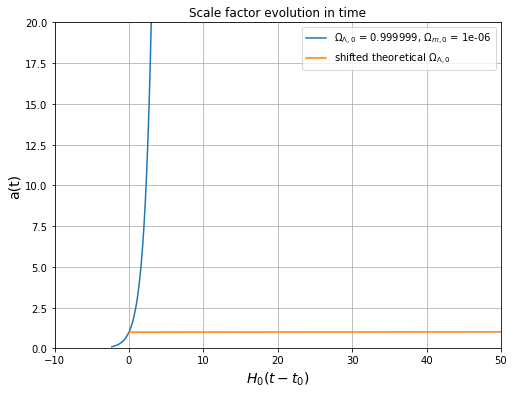

In [280]:
fig = plt.figure(figsize=(8, 6))
plt.title("Scale factor evolution in time")
plt.xlabel(r"$H_0 (t-t_0)$", fontsize = 14)
plt.ylabel("a(t)",fontsize = 14)
plt.grid(True)
plt.xlim(-10,50)
plt.ylim(0,20)

pyomlam = (r"$\Omega_{\Lambda,0}$")
pyommat = (r"$\Omega_{m, 0}$")


for result in final_results:
    plt.plot(result["h"] * (np.array(result["t"]) - result["tzero"]), np.array(result["a"]),
            label = "{pyomlam} = {om_lam}, {pyommat} = {om_mat}".format(
                pyomlam = pyomlam, om_lam = result["om_lam"], pyommat = pyommat, om_mat = result["om_mat"]))
    
    plt.plot(np.linspace(-10, 100, 1000) +10, generic(np.linspace(-10, 100, 1000), result["om_lam"]), label = "shifted theoretical {pyomlam}".format(
    pyomlam = pyomlam))
    plt.legend()
    

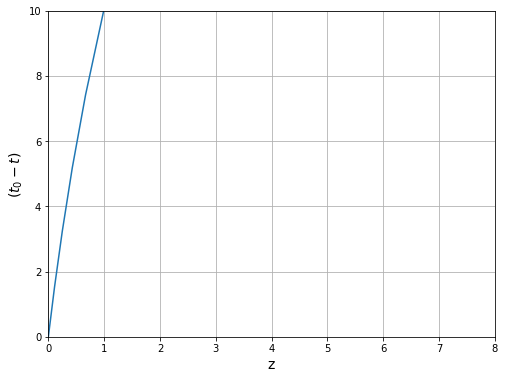

In [281]:
fig = plt.figure(figsize = (8,6))
plt.xlim(0,8)
plt.ylim(0,10)
plt.xlabel("z", fontsize = 14)
plt.ylabel(r"$(t_0 - t)$", fontsize = 14)
for result in final_results:
    plt.plot((np.array(result["a"])**(-1) - 1), (result["tzero"] - np.array(result["t"])))
    plt.grid(True)

In [272]:
np.array(result["a"])**(-1) - 1

array([ 9.        ,  4.        ,  2.33333333,  1.5       ,  1.        ,
        0.66666667,  0.42857143,  0.25      ,  0.11111111,  0.        ,
       -0.09090909, -0.16666667, -0.23076923, -0.28571429, -0.33333333,
       -0.375     , -0.41176471, -0.44444444, -0.47368421, -0.5       ,
       -0.52380952, -0.54545455, -0.56521739, -0.58333333, -0.6       ,
       -0.61538462, -0.62962963, -0.64285714, -0.65517241, -0.66666667,
       -0.67741935, -0.6875    , -0.6969697 , -0.70588235, -0.71428571,
       -0.72222222, -0.72972973, -0.73684211, -0.74358974, -0.75      ,
       -0.75609756, -0.76190476, -0.76744186, -0.77272727, -0.77777778,
       -0.7826087 , -0.78723404, -0.79166667, -0.79591837, -0.8       ,
       -0.80392157, -0.80769231, -0.81132075, -0.81481481, -0.81818182,
       -0.82142857, -0.8245614 , -0.82758621, -0.83050847, -0.83333333,
       -0.83606557, -0.83870968, -0.84126984, -0.84375   , -0.84615385,
       -0.84848485, -0.85074627, -0.85294118, -0.85507246, -0.85

In [215]:
result["a"]

[0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.2,
 9.3,
 9.4,
 9.5,
 9.6,
 9.7,
 9.8,
 9.9,
 10.0,
 10.1,
 10.2,
 10.3,
 10.4,
 10.5,
 10.6,
 10.7,
 10.8,
 10.9,
 11.0,
 11.1,
 11.2,
 11.3,
 11.4,
 11.5,
 11.6,
 11.7,
 11.8,
 11.9,
 12.0,
 12.1,
 12.2,
 12.3,
 12.4,
 12.5,
 12.6,
 12.7,
 12.8,
 12.9,
 13.0,
 13.1,
 13.2,
 13.3,
 13.4,
 13.5,
 13.6,
 13.7,
 13.8,
 13.9,
 14.0,
 14.1,
 14.2,
 14.3,
 14.4,
 14.5,
 14.6,
 14.7,
 14.8,
 14.9,
 15.0,
 15.1,
 15.2,
 15.3,
 15.4,
 15.5,
 15.6,
 15.7,
